In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Read in Shapefile containing Comuna perimeter data in polygon data structures
shapefile = gpd.read_file("comunas/comunas_wgs84.shp")
#Read in iNaturalist Data containing all monk parakeet sitings
iNaturalist = pd.read_csv("comunas/monkParakeet.csv", sep='\t')

In [24]:
#Initializes new column of shapefile to store monk parakeet population
shapefile['monkParakeetPopulation'] = 0
#Iterate through each iNaturalist monkParakeet siting which longitude and latitude
for i in range(len(iNaturalist)):
    #Obtain the latitude and longitude for each respective parakeet
    parakeetLongitude = iNaturalist["decimalLongitude"][i]
    parakeetLatitude = iNaturalist["decimalLatitude"][i]
    #Iterate through each comuna.  Check if coordinates of parakeets within comunas
    for j in range(len(shapefile)):
        comunaPerimeter = shapefile.bounds.iloc[j]
        minimumLongitude = comunaPerimeter[0]
        minimumLatitude = comunaPerimeter[1]
        maximumLongitude = comunaPerimeter[2]
        maximumLatitude = comunaPerimeter[3]
        if (parakeetLongitude >= minimumLongitude and 
            parakeetLongitude <= maximumLongitude and
            parakeetLatitude >= minimumLatitude and 
            parakeetLatitude <= maximumLatitude):
            #7 is index of monkParakeetPopulation column.  Increments the respective row by 1
            shapefile.iloc[j, 7] += 1
        
       

(-58.54133716153072,
 -58.32533190085694,
 -34.714233319336955,
 -34.51754926743531)

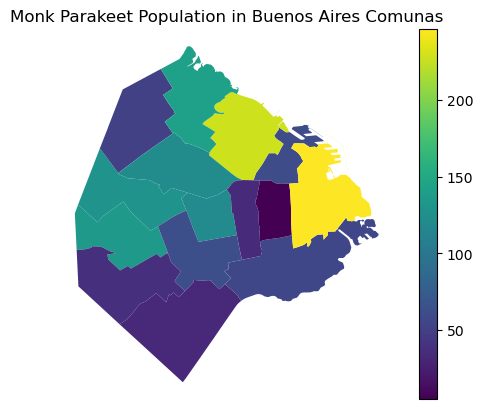

In [25]:
#Plots a chloropeth map based on the monkParakeetPopulation column
shapefile.plot(column="monkParakeetPopulation", legend=True)




plt.title("Monk Parakeet Population in Buenos Aires Comunas")
plt.axis("off")